In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [107]:
def bakSneppen(size=200,steps=1000,random=np.random.rand):
    
    chain = random(size)
    chains = []
    min_idx_list = []
    
    for n in range(steps):
        min_idx = chain.argmin()
        min_idx_list.append(min_idx)
        
        for i in [-1,0,1]:
            index = (min_idx+i)%size
            chain[index] = random()
            
        chains.append(chain.copy())
        
    return np.array(chains), min_idx_list


In [157]:
def avalanches(min_idx_list):

    avalanches_dict = {}
    avalanche_length = 0
    d_idx = 0
    indicies = []

    for prev, new in zip(min_idx_list,min_idx_list[1:]):
        if abs(prev-new)<2:
            avalanche_length +=1
            indicies.append(prev)

        elif avalanche_length>0:
            avalanches_dict[d_idx] = {"tspan":avalanche_length,
                                      "xspan":max(indicies)-min(indicies)}
            avalanche_length = 0
            d_idx+=1
            indicies = []
            
    return avalanches_dict

In [147]:
def skipInit(chains,patience=100,tol=0.01):
    m = chains.mean(axis=1)
    for index, mean in enumerate(m):
        if index>patience:
            if abs(mean-np.mean(m[index-patience:index])) < tol:
                return index

In [152]:
chains, min_idx_list = bakSneppen(size=500,steps=100000,random=np.random.rand)

In [253]:
skip_init = skipInit(chains,patience=500,tol=0.000001)
avalanches_dict = avalanches(min_idx_list[skip_init:])

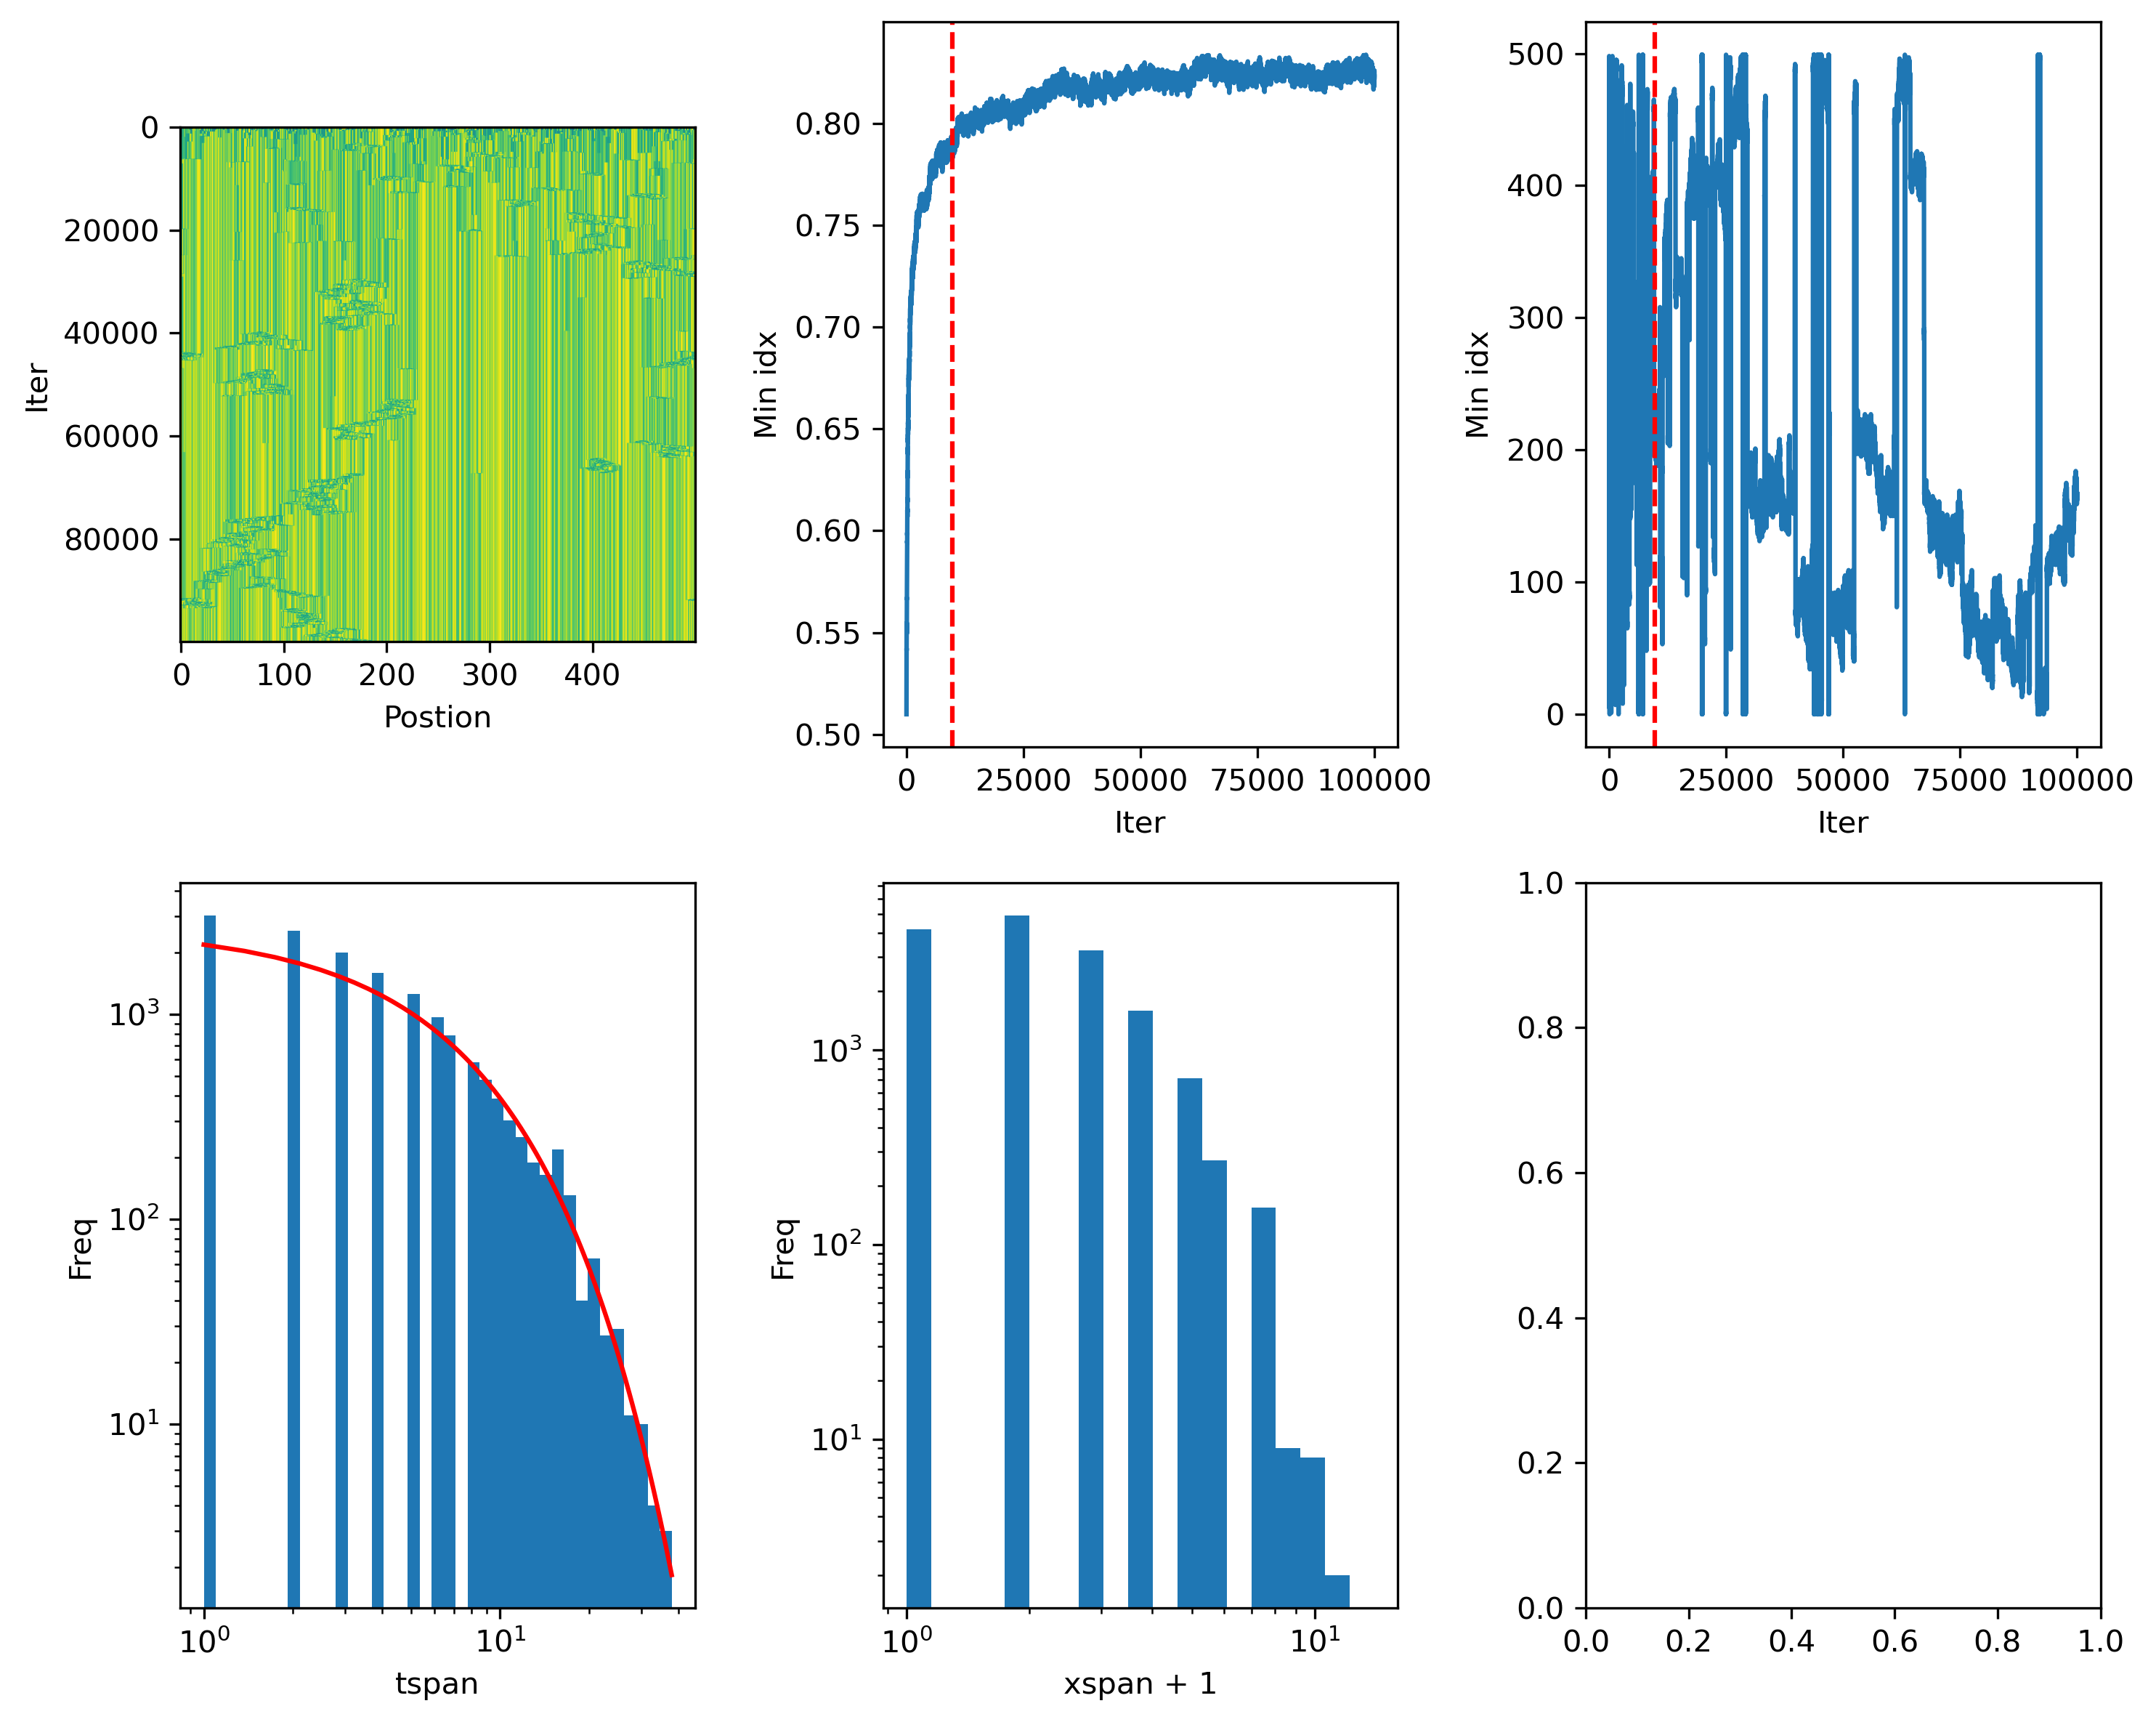

In [261]:
fig,ax = plt.subplots(2,3,figsize=(10,8),dpi=300)
    
ax[0,0].imshow(chains,aspect=chains.shape[1]/chains.shape[0])
ax[0,0].set(xlabel="Postion",ylabel="Iter")

ax[0,1].plot(chains.mean(axis=1))
ax[0,1].set(xlabel="Iter",ylabel="Min idx")
ax[0,1].axvline(skip_init,c="red",ls="--")

ax[0,2].plot(min_idx_list)
ax[0,2].set(xlabel="Iter",ylabel="Min idx")
ax[0,2].axvline(skip_init,c="red",ls="--")

tspan = [avalanches_dict[i]['tspan'] for i in avalanches_dict]
log_min, log_max = np.log10(min(tspan)), np.log10(max(tspan))
a = ax[1,0].hist(tspan,bins=np.logspace(log_min,log_max,40))
ax[1,0].set(xscale="log",yscale="log",
            xlabel="tspan",ylabel="Freq")
  
xdata = a[0]
ydata = ((np.roll(a[1],-1)+a[1])/2)[:-1]

xdata, ydata = xdata[22:],ydata[22:] 


def log_func(x,a,b,c):
    return a*np.exp(b*(c-x))



ax[1,0].plot(x,log_func(x,*popt),c="r")


xspan = [avalanches_dict[i]['xspan']+1 for i in avalanches_dict]
log_min, log_max = np.log10(min(xspan)), np.log10(max(xspan))
ax[1,1].hist(xspan,bins=np.logspace(log_min,log_max,20))
ax[1,1].set(xscale="log",yscale="log",xlabel="xspan + 1",ylabel="Freq")

plt.tight_layout();

<ipython-input-236-2ecb3a625fc6>:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*(c-x))


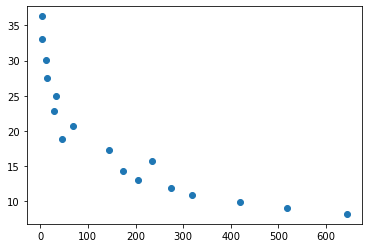

In [236]:
def log_func(x,a,b,c):
    return a*np.exp(b*(c-x))
    
xdata = a[0]
ydata = ((np.roll(a[1],-1)+a[1])/2)[:-1]
xdata, ydata = xdata[22:],ydata[22:] 
p0=[30,0.25,0]
ax[1,0].plot(x,log_func(x,*p0),c="orange")
popt, pcov = curve_fit(log_func,xdata,ydata,p0=p0,maxfev=20000)


ax[1,0].plot(x,log_func(x,*popt),c="r")

plt.scatter(xdata,ydata)

In [184]:
xdata = a[0]
ydata = np.roll(a[1],1)[1:]

In [203]:
((np.roll(a[1],-1)+a[1])/2)[:-1]

array([ 1.10550329,  1.33877177,  1.62126143,  1.96335827,  2.37763979,
        2.87933745,  3.48689662,  4.22265477,  5.11366273,  6.19267925,
        7.49937536,  9.08179295, 10.99811108, 13.31878495, 16.12913629,
       19.53249028, 23.65397437, 28.64511875, 34.68942747])

In [196]:
a[1]

array([ 1.        ,  1.21100659,  1.46653695,  1.77598591,  2.15073063,
        2.60454896,  3.15412594,  3.81966729,  4.62564225,  5.60168322,
        6.78367528,  8.21507544,  9.94851046, 12.04771169, 14.58985821,
       17.66841438, 21.39656618, 25.91138257, 31.37885494, 38.        ])

In [252]:
for i in popt:
    print(i)

2979.6208471747595
0.19415542083649226
-0.048479705652392
